<h1> Maximum de Vraisemblance, Régression Linéaire, Zones de Confiance et Traitement de Data Massives Collectées. </h1>

<b>Authors: </b>
- Ibrahim Lahlou
- Fatima azzahra Ettarfi


<b>Les Questions :</b>
1. Génération aléatoires de données massives.
2. Comparaison des data générées avec la distribution Normale $N(\mu; \sigma)$.
3. Estimation par Maximum de Vraisemblance (Maximum Likelihood Estimation).
4. Estimation par Moindre Carré (Least Squares) et Régression linéaire.
5. Estimation par intervalles de confiance à une tolérance astreinte.
6. Exemple 1 de data collectées : Âges des étudiants d’une université.


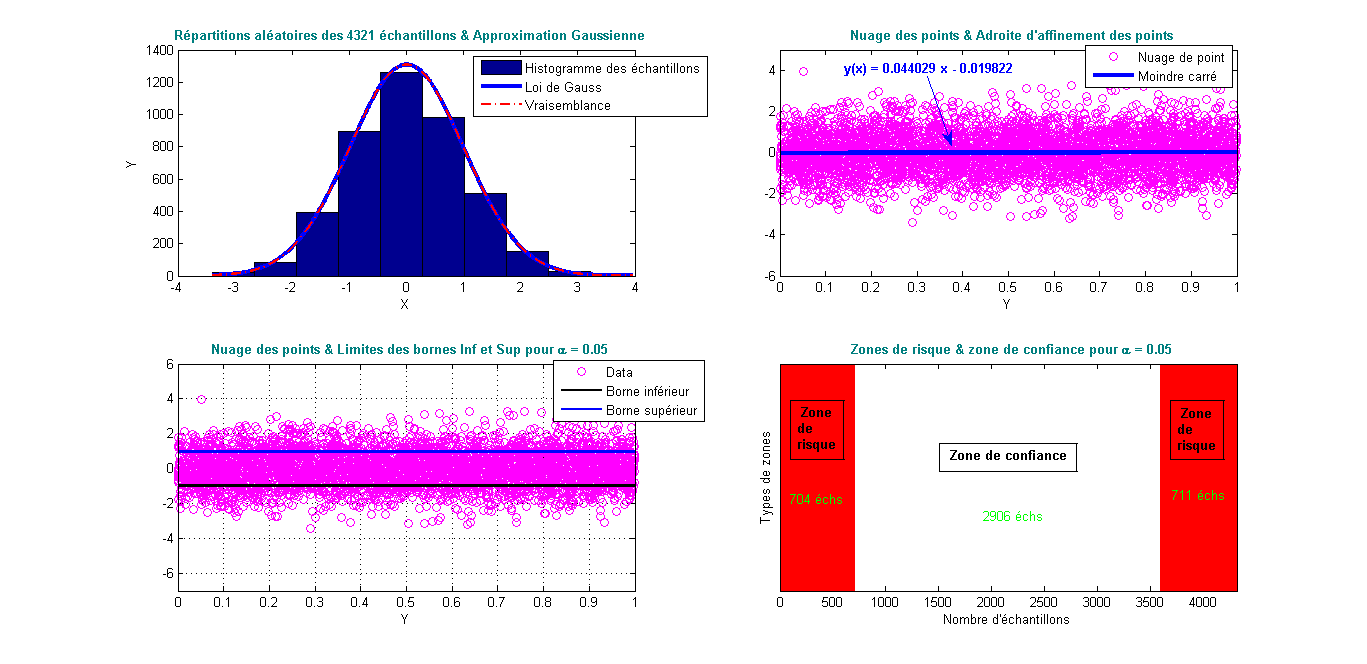

<font color="purple">
    <h2 >Question 1 : Génération alétoires de données massives</h2>
</font>

In [1]:
#L'installation d'anaconda vous fournira tout les bibliothèque nécessaire pour la data Science
import numpy as np
import matplotlib.pyplot as plt

def box_muller(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)

    R = np.sqrt(-2 * np.log(np.where(U1 > 0, U1, 1e-10)))  

    Theta = 2 * np.pi * U2
    Z = R * np.cos(Theta)

    return Z


L'algorithme de Box-Muller permet de générer des variables aléatoires normalement distribuées en utilisant les variables $U_1$ et $U_2$ comme suit :

\begin{align*}
R &= \sqrt{-2 \log(U_1)}, \\
\Theta &= 2\pi U_2, \\
Z &= R \cos(\Theta).
\end{align*}

c'est a dire

$$ Z = \sqrt{-2 \log(U_1)} \cos(2\pi U_2)$$
La variable aléatoire $Z$ obtenue ainsi suit une distribution normale standard.


Sachant que $U_1, U_2, \ldots$ une séquence de variables aléatoires indépendantes et identiquement distribuées selon une loi normale standard.

<h5>  1.1 Génération des données </h5>

In [2]:
#n = int(input("Éntrer le nombre d’échantillons à tester = "))
#alpha = float(input("Éntrer la valeur de alpha paramètre (comprise entre 0 et 1) = ")) 
#var = float(input("Éntrer la valeur attribuée à la variance (entre 0 et 1) = "))
#X = box_muller(n)
#Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)

<h5> 1.2 Les histogrammes des data massives générées correspondant aux nombres n = 20, 50, 300, 1000 et 7000 </h5>

In [3]:
def visualize_histograms(X,Y,n, alpha, var):
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    
    # Affichage de l'histogramme
    plt.hist(Y, bins='auto', alpha=alpha, color='blue')
    
    # Affichage du texte indiquant le nombre d'échantillons
    plt.text(0.5, -0.2, f"Histogrammes des données massives générées correspondant à n = {n}",
             horizontalalignment='center', transform=plt.gca().transAxes)
    
    # Ajout des points sous forme de cercles vides
    plt.scatter(X, Y, marker='o', facecolors='none', edgecolors='red')
  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Histogrammes des données massives générées correspondant à n = {n}")
    
    plt.grid(True)
    plt.show()

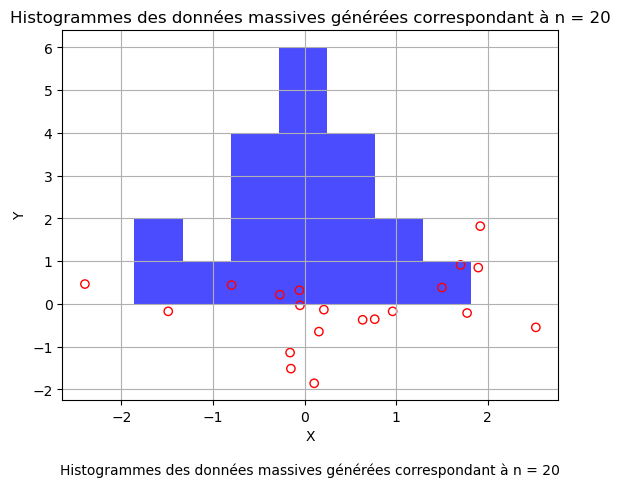

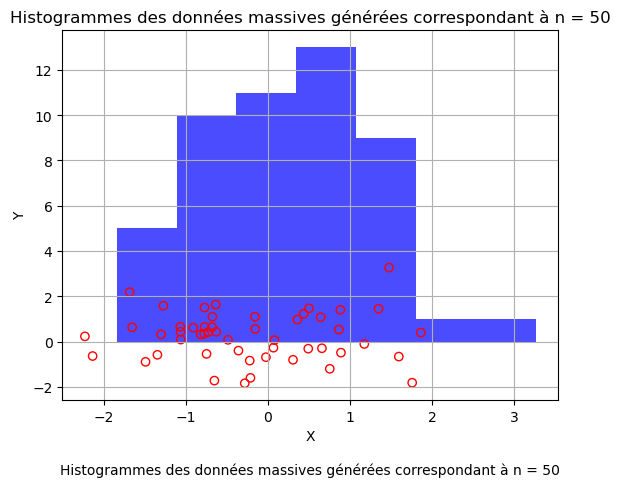

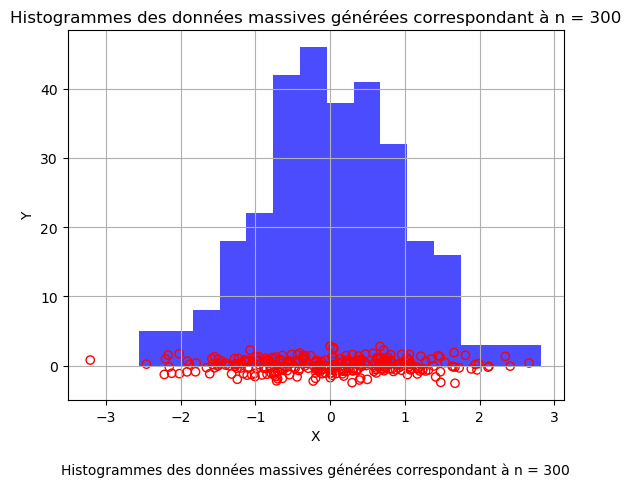

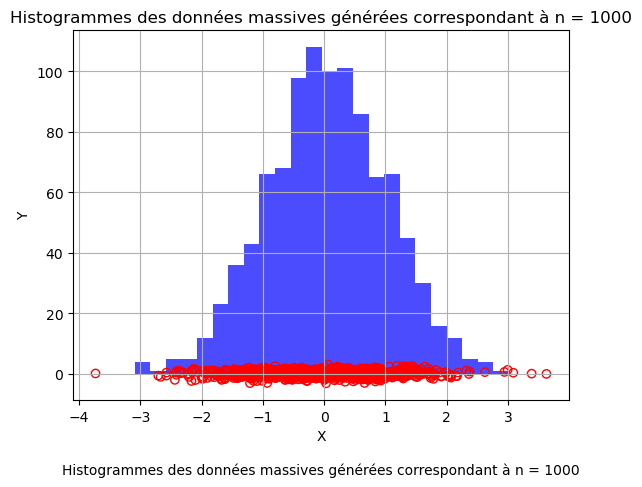

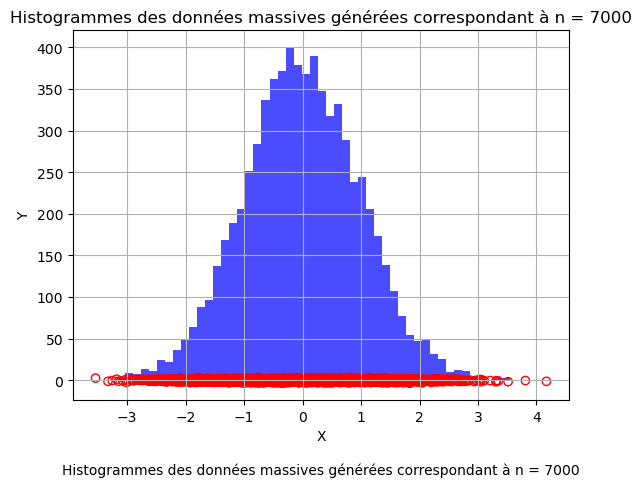

In [4]:
lst = [20,50,300,1000,7000]

alpha =0.7
var = 0.5

for n in lst:
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    visualize_histograms(X,Y,n, alpha, var)

<font color="green" ><h4>Intérprétation :</h4></font>

On Observe que plus on agglomére un grands nombre d'échantillons ensemble ,la distribution tend à ressembler à celle de la loi normal

<font color="green" ><h4>Demonstration Mathématique:</h4></font>

\begin{align*}
X_1, X_2, \ldots, X_n & \text{ i.i.d. avec moyenne } \mu \text{ et variance } \sigma^2.\\
S_n &= X_1 + X_2 + \ldots + X_n.\\
E[S_n] &= n\mu, \quad \text{Var}(S_n) = n\sigma^2.\\
\text{Selon le théorème central limite,} \\
\lim_{{n \to \infty}} \frac{{S_n - n\mu}}{{\sqrt{n\sigma^2}}} &\approx \text{Distribution normale}.
\end{align*}

<font color="green" ><h4>Conclusion :</h4></font>

Cela démontre que lorsque le nombre d'échantillons 

n devient très grand, la somme des échantillons $S_n$
  tend à se rapprocher d'une distribution normale avec une moyenne de $\mu$
nμ et une variance de 2nσ 

<font color="purple">
    <h2 >Question 2 : Comparaison des données générées avec la distribution Normale N(μ,σ).</h2>
</font>

$$X=\sqrt{-2log(U1)}cos(2\pi U2) \\ Y=\alpha*\sqrt{-2log(U1')}cos(2\pi U2') $$

Nous utiliserons des données entre 0 et 1 pour bien estimé les données et pour cela nous devons faire quelque réglage 


<h5>2.1 Affichage des valeurs, de la moyenne
$\mu$ et de l’écart-type $\sigma$</h5>

In [35]:
import numpy as np

np.random.seed(123)
alpha = 0.7
var = 0.5
n = 4500

def box_muller_normal(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    X = Z1 * np.sqrt(var)
    
    V1 = np.random.uniform(0, 1, n)
    V2 = np.random.uniform(0, 1, n)
    Z2 = np.sqrt(-2 * np.log(V1)) * np.cos(2 * np.pi * V2)
    Y = alpha * Z2 + 0.1
    return X, Y

X, Y = box_muller_normal(n)

stat = {
    "Moyenne de Y": np.mean(Y),
    "Écart-type de Y": np.std(Y),
    "Point du centre de données G": [np.mean(X), np.mean(Y)]
}

for key, value in stat.items():
    print(f"{key}: {value}")


Moyenne de Y: 0.09797123419575544
Écart-type de Y: 0.7072235917892845
Point du centre de données G: [-0.003524668661391374, 0.09797123419575544]


<h5>2.2 Estimation des valeurs, de la moyenne
$\mu$ et de l’écart-type $\sigma$ pour X et Y </h5>

L'estimation des distributions normales pour les données Y et X est réalisée en utilisant les paramètres de la moyenne et de l'écart-type. Ces paramètres caractérisent la forme de la distribution normale et permettent de comparer les données observées avec cette distribution théorique.

In [36]:
from scipy.stats import norm 

dist = {
'y' : norm.fit(Y) ,
'x' : norm.fit(X)
}

print("\nFitted Normal distribution for Y (moyenne , écart-type): \n----------------------------------------\n",dist['y']) 
print("\nFitted Normal distribution for X (moyenne , écart-type):\n----------------------------------------\n", dist['x']) 


dist['y'][0]



Fitted Normal distribution for Y (moyenne , écart-type): 
----------------------------------------
 (0.09797123419575544, 0.7072235917892845)

Fitted Normal distribution for X (moyenne , écart-type):
----------------------------------------
 (-0.003524668661391374, 0.7074268543338573)


0.09797123419575544

<font color="green" ><h4>Interprétation :</h4></font>

On constate que les moyennes qui découlent de Ajustement de la distribution de données normale sont égale à la moyenne d'origine

<h5>2.2 Estimation des valeurs, de la moyenne
$\mu$ et de l’écart-type $\sigma$ pour X et Y </h5>

Comme X est un V.A qui suit la loi de Gauss a une fonction de densité  de  proba qui s'ecrit sous la forme
$$f_x(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-(\frac{x-\mu}{\sqrt{2}\sigma})^2}=K.E(x)$$

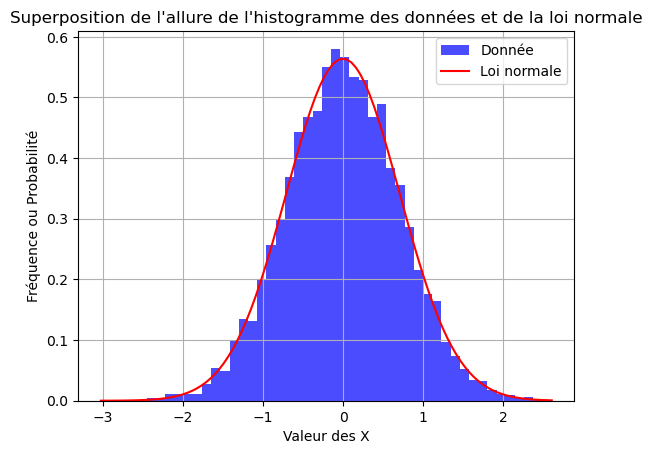

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def MMSE_viz_TCL(X):

    mean = np.mean(X)
    std = np.std(X)

    # Affichage de l'histogramme des données
    plt.hist(X, bins='auto', color='blue', alpha=0.7, density=True , label = 'Donnée')

    x = np.linspace(np.min(X), np.max(X), 100)
    E = lambda x:np.exp(-0.5 * ((x - mean) / std) ** 2)
    K =  1 / (std * np.sqrt(2 * np.pi)) 
    y = K*E(x)

    # Affichage de la courbe de la loi normale
    plt.plot(x, y, color='red', label='Loi normale')

    plt.xlabel('Valeur des X')
    plt.ylabel('Fréquence ou Probabilité')
    plt.title("Superposition de l'allure de l'histogramme des données et de la loi normale")
    plt.legend()
    plt.grid(True)
    plt.show()


MMSE_viz_TCL(X)


<font color="green" ><h4>Interprétation :</h4></font>

Les données massives générées suivent bien la distribution de la loi normale centrée réduite.

<font color="green" ><h4>Test de Normalité :</h4></font>

In [38]:
from scipy import stats
statistic, p_value = stats.normaltest(X) 

# Afficher les résultats
alpha = 0.05  # Niveau de signification
print("Résultats du test de normalité:")
print(f"Statistique du test: {statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Les données ne suivent pas une distribution normale.")
else:
    print("Les données suivent une distribution normale.")

Résultats du test de normalité:
Statistique du test: 2.285578369979402
P-value: 0.31892823026993455
Les données suivent une distribution normale.


<font color="purple">
    <h2 >Question 3 : Estimation par Maximum de Vraisemblance (Maximum Likelihood Estimation). </h2>
</font>

<h5>3.1 Estimateurs de μ et σ par la méthode de maximum de vraisemblance</h5>


Estimation par maximum de vraisemblance

Soit $(X_i \sim \text{Poisson}(\theta))$, où $(\theta)$ est le paramètre à estimer.
$$
X  \approx \epsilon(1/\mu) = \begin{cases} 0 & \text{si } x < 0 \\ x & \text{si } x \geq 0 \end{cases}
$$

$$
L_\theta(x_1,x_2,\dots,x_n) = \prod\limits_{i=1}^{n}{P(x=x_i)} = \frac{1}{\mu} e^{-\sum\limits_{i=1}^{n}x_i/n}
$$

Pour résoudre $\theta$, on cherche :
$$
\widehat{\theta_{MV}} = \arg\max_{\theta} L(\theta)
$$
Ce qui revient à résoudre :
$$
\frac{dL(\theta)}{d\theta} = 0 \quad \text{et} \quad \frac{d^2L(\theta)}{d\theta^2} < 0
$$
On obtient :
$$
\widehat{\theta_{MV}} = \frac{\sum\limits_{i=1}^{n}x_i}{n}
$$


Essayant d'estimer la valeur de $\mu$ et $\sigma$ avec leurs intervalles de confiances


$$
\text{Intervalle de confiance (95\%) pour la moyenne : } \bar{X} \pm z \left(\frac{\sigma}{\sqrt{n}}\right)
$$

$$
\text{Intervalle de confiance (95\%) pour l'écart-type : } s \pm z \left(\frac{s}{\sqrt{2(n-1)}}\right)
$$


In [39]:
mean_MV, std_MV = stats.norm.fit(Y) # Similaire a la commandes

print("Estimation des paramètres par maximum de vraisemblance (MV):")
print("Moyenne MV:", mean_MV)
print("Intervalle de confiance (95%) de la moyenne MV:", stats.norm.interval(0.95, loc=mean_MV, scale=std_MV/np.sqrt(n)))
print("Écart-type MV:", std_MV)
print("Intervalle de confiance (95%) de l'écart-type MV:", stats.norm.interval(0.95, loc=std_MV, scale=std_MV/np.sqrt(2*(n-1))))

Estimation des paramètres par maximum de vraisemblance (MV):
Moyenne MV: 0.09797123419575544
Intervalle de confiance (95%) de la moyenne MV: (0.07730798688139415, 0.11863448151011674)
Écart-type MV: 0.7072235917892845
Intervalle de confiance (95%) de l'écart-type MV: (0.6926108457633054, 0.7218363378152636)


<h5>3.2 Comparaison </h5>

si on calcule la différence entre la valeurs estimé par la méthode de maximum de vraisemblance et l'estimation par ajustement à la distribution normal nous trouvons que la valeurs est trés petite à l'ordre de $10^{-3}$

In [40]:
print("Normal dist \t     |Maximum de vraisemblance")
print("----------------------------------------------")
print(dist['y'][0],"|",mean_MV)
print(dist['y'][1],"  |",std_MV)

Normal dist 	     |Maximum de vraisemblance
----------------------------------------------
0.09797123419575544 | 0.09797123419575544
0.7072235917892845   | 0.7072235917892845


3.3 

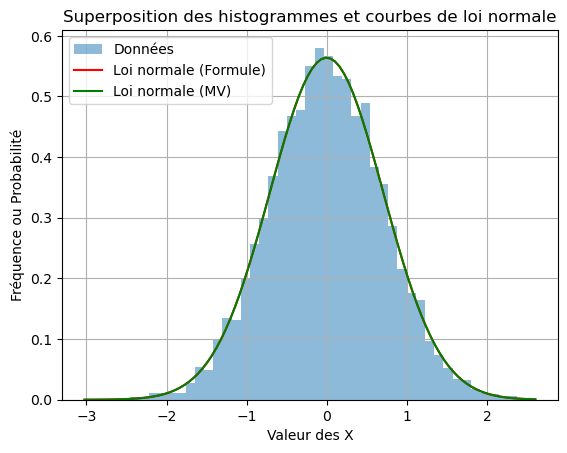

In [41]:
def MLE_viz_TCL(X):
    mean_MV, std_MV = stats.norm.fit(X)

    mean_formula = np.mean(X)
    std_formula = np.std(X)

    plt.hist(X, bins='auto', density=True, alpha=0.5, label='Données')
    x = np.linspace(np.min(X), np.max(X), 100)
    plt.plot(x, stats.norm.pdf(x, loc=mean_formula, scale=std_formula), 'r-', label='Loi normale (Formule)')
    plt.plot(x, stats.norm.pdf(x, loc=mean_MV, scale=std_MV), 'g-', label='Loi normale (MV)')
    plt.xlabel('Valeur des X')
    plt.ylabel('Fréquence ou Probabilité')
    plt.title('Superposition des histogrammes et courbes de loi normale')
    plt.legend()
    plt.grid(True)
    plt.show()
    
MLE_viz_TCL(X)


<font color="green" ><h4>Interprétation :</h4></font>

Les allures déduit de la méthode de maximum de vraisemblances se raccordent bien avec la distribution normale ce qui justifie le faite que cette méthode est fiable pour estimer les paramètres d'un modèle statistique à partir des données observées.


<font color="purple">
    <h2 >Question 4 : Estimation par Moindre Carré (Least Squares) et Régression linéaire. </h2>
</font>

<h5>4-1. l'équation de régresionn $$y(x)=\beta_0+x\beta_1$$</h5>

In [42]:
P = np.polyfit(X.flatten(), Y, 1) 
beta1,beta0 = P[0],P[1]

In [43]:
print(f"La droite de régression est : {beta1}x + {beta0}")

La droite de régression est : 0.001607709522407058x + 0.09797690083912568


<h5>4-2. Graphique du nuage de point</h5>

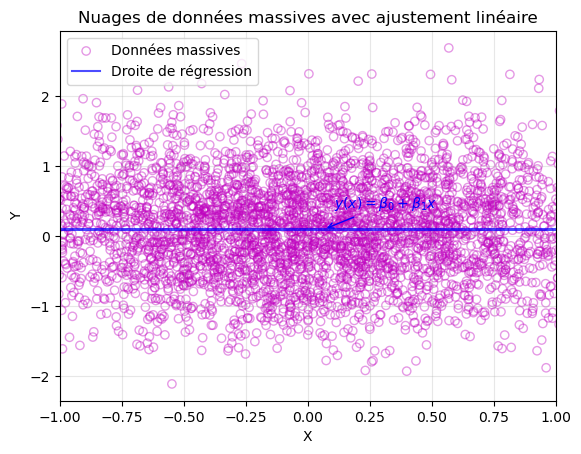

In [56]:
plt.scatter(X, Y, color='m', marker='o', facecolor='none', alpha=0.4, label='Données massives')

# Plot the regression line
plt.plot(X, beta1*X + beta0, color='b', alpha=0.7, label='Droite de régression')

# Set the title, labels, legend, and grid
plt.title("Nuages de données massives avec ajustement linéaire")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(alpha=0.3)

# Add annotation for the regression equation
plt.annotate('$y(x) = \\beta_0 + \\beta_1 x$', xy=(X[0], beta1*X[0] + beta0),
             xytext=(X[0] + 0.04, beta1*X[0] + beta0 + 0.3),
             arrowprops=dict(arrowstyle='->', color='blue'), color='blue')

# Set the x-axis limit to -1 and 1
plt.xlim(-1, 1)

plt.show()


<h5>4-3 Les estimateurs ponctuels $\widehat{a_{l,s}}$  et $\widehat{b_{l,s}}$</h5>

In [57]:
# Ajouter une colonne de 1 à la matrice X
X = X.reshape(n, 1)
X1 = np.concatenate((np.ones((len(X), 1)), X), axis=1)
estimateur = np.linalg.lstsq(X1, Y, rcond=None)[0]
b = estimateur[0] # Coefficient de l'ordonnée à l'origine
a = estimateur[1] # Coefficient de la pente
print(f"Les estimateurs ponctuels sont a = {a} et b = {b}")

Les estimateurs ponctuels sont a = 0.0016077095224070225 et b = 0.09797690083912568


<h5>4-4 Vérification du Barycentre (centre d'inertie) du nuage de point si il appartient a la droite de régression </h5>

In [58]:
Point_G = [np.mean(X), np.mean(Y)]
if np.isclose(Point_G[0] * beta1 + beta0, Point_G[1]):
    print("Le point G appartient à la droite de régression")
else:
    print("Le point G n'appartient pas à la droite de régression")

Le point G appartient à la droite de régression


<h5>4-5 Coefficient de détermination $R^2$ </h5>

In [59]:
corr = np.corrcoef(X.flatten(), Y.flatten())
R = np.sqrt((corr[0, 1] ** 2) / (np.var(X) * np.var(Y)))
print("Le coefficient de détermination R ~", R)

Le coefficient de détermination R ~ 0.003214356964807316


<font color="green"><h5>Intérprétation :</h5></font>

R << 1 $\iff$ L'ajustement de la régression est de mauvaise qualité

<font color="purple">
    <h2 >Question 5 : Estimation par intervalles de confiance à une tolérance astreinte.
. </h2>
</font>

<h5>5-1  Zone de Confiance Graphique </h5>

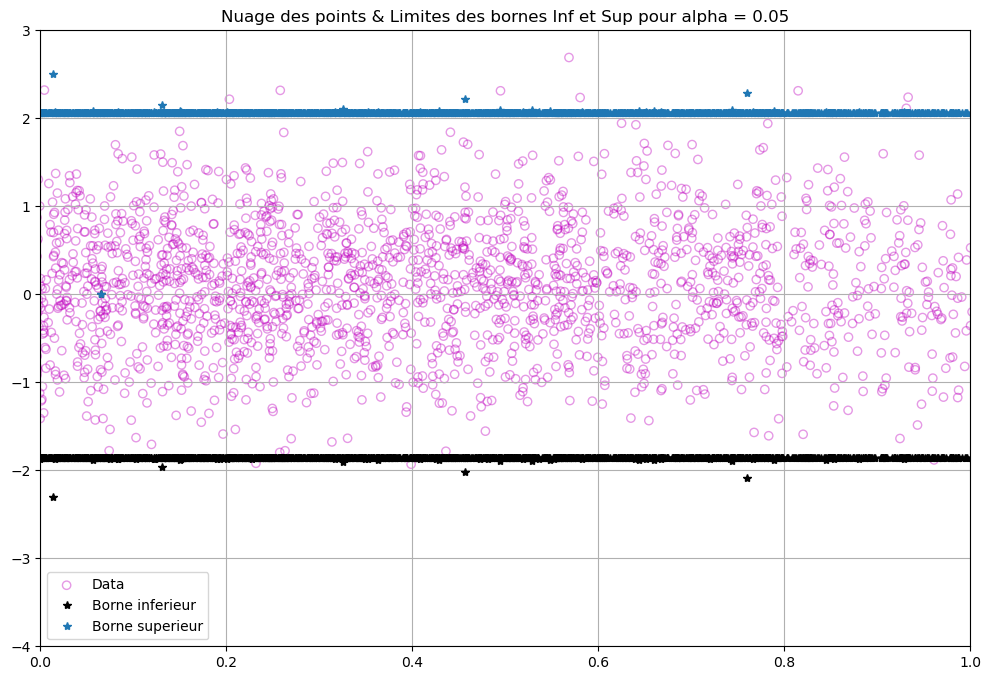

In [60]:
plt.figure(figsize=(12, 8))

Yx = beta0 + beta1 * X.flatten()
err = np.abs(Y - Yx)
Xe = np.mean(X)
Ye = np.mean(Y)
stats = np.sum(err ** 2) / (n - 2)

En1 = np.abs(Y - Yx)
En2 = 100 * En1
z = 1.96
borne_inf = np.zeros(n)
borne_sup = np.zeros(n)

for i in range(2, n):
    somme = np.sum((X[i] - Xe) ** 2)
    borne_inf[i] = Yx[i] - z * np.sqrt(stats) * np.sqrt(1 + 1 / (i - 1) + ((X[i] - Xe) ** 2) / somme)
    borne_sup[i] = Yx[i] + z * np.sqrt(stats) * np.sqrt(1 + 1 / (i - 1) + ((X[i] - Xe) ** 2) / somme)

plt.scatter(X, Y, color='none', edgecolor='m', alpha=0.4)
plt.axis([0, 1, np.floor(np.min(Y) - 1), np.floor(np.max(Y) + 1)])
plt.plot(X, borne_inf, '*k')
plt.plot(X, borne_sup, '*')
plt.grid(True)
plt.legend(['Data', 'Borne inferieur', 'Borne superieur'])
plt.title(f"Nuage des points & Limites des bornes Inf et Sup pour alpha = {alpha}")
plt.show()


<h5>5-2  Les stastiques + Figure qui montre les zones délimitant les bornes inférieur et supérieur (Boîte à moustache) </h5>

In [61]:
zone_confiance = np.where((Y >= borne_inf) & (Y <= borne_sup))
nombre_points_confiance = len(zone_confiance[0])

result ={
    'Moyenne' : np.mean(Y[zone_confiance]),
    'Écart-type' : np.std(Y[zone_confiance]),
    'Min' : np.min(Y[zone_confiance]),
    'Max' : np.max(Y[zone_confiance])
}

for v in result.items():
    print(v)

('Moyenne', 0.09436746567918256)
('Écart-type', 0.6937053550681461)
('Min', -1.7971253130619527)
('Max', 2.024000107505533)


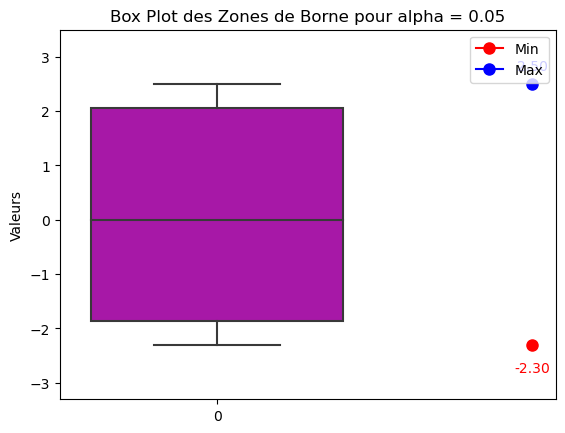

In [62]:
import seaborn as sns

data_ZC = np.concatenate((borne_inf, borne_sup))
sns.boxplot(data=data_ZC, color='m', fliersize=0)

min_value = np.min(data_ZC)
max_value = np.max(data_ZC)
plt.plot(1, min_value, marker='o', color='red', markersize=8, label='Min')
plt.plot(1, max_value, marker='o', color='blue', markersize=8, label='Max')

plt.annotate(f"{min_value:.2f}", (1, min_value), xytext=(0, -20), textcoords='offset points', color='red', ha='center')
plt.annotate(f"{max_value:.2f}", (1, max_value), xytext=(0, 10), textcoords='offset points', color='blue', ha='center')


plt.ylabel('Valeurs')
plt.title(f"Box Plot des Zones de Borne pour alpha = {alpha}")
plt.legend()

# Les limites 
plt.ylim(np.min(data_ZC) - 1, np.max(data_ZC) + 1)
plt.show()

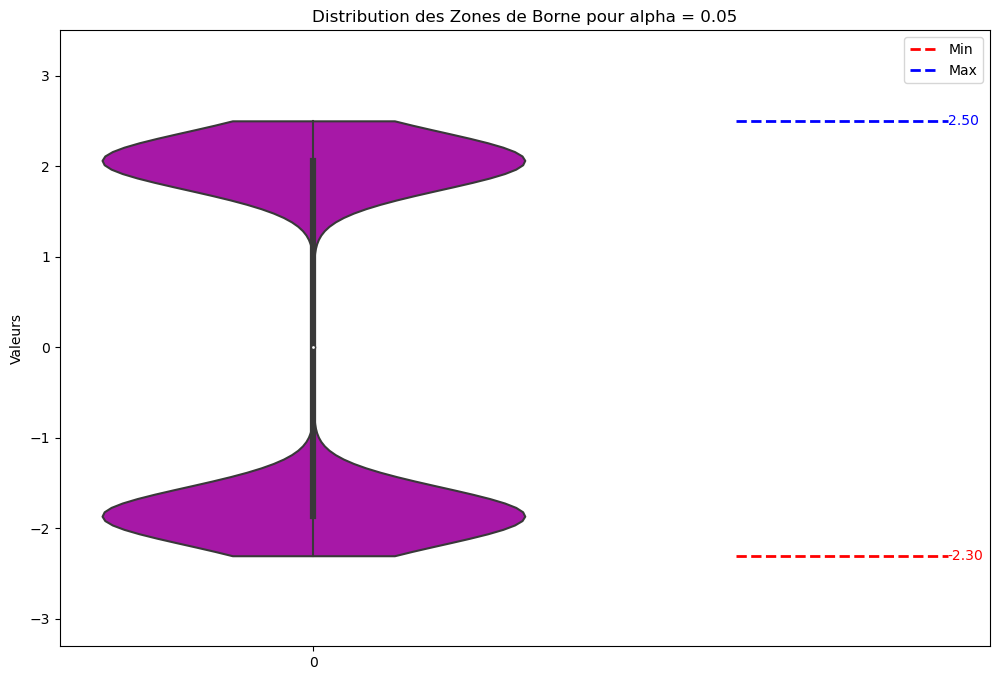

In [63]:
plt.figure(figsize=(12, 8))

sns.violinplot(data=data_ZC, color='m', inner='box', cut=0)

min_value = np.min(data_ZC)
max_value = np.max(data_ZC)
plt.plot([0.8, 1.2], [min_value, min_value], color='red', linestyle='--', linewidth=2, label='Min')
plt.plot([0.8, 1.2], [max_value, max_value], color='blue', linestyle='--', linewidth=2, label='Max')

plt.text(1.2, min_value, f"{min_value:.2f}", color='red', va='center')
plt.text(1.2, max_value, f"{max_value:.2f}", color='blue', va='center')

plt.ylabel('Valeurs')
plt.title(f"Distribution des Zones de Borne pour alpha = {alpha}")
plt.legend()

plt.ylim(np.min(data_ZC) - 1, np.max(data_ZC) + 1)
plt.show()


<h5>5-3 Ajustement par droit approximées selon les moindres carrées</h5>

In [64]:
P2 = np.polyfit(X.flatten(), borne_inf.flatten(), 1)
P3 = np.polyfit(X.flatten(), borne_sup.flatten(), 1)

B_inf = P2[0] * X + P2[1]
B_sup = P3[0] * X + P3[1]

<h5>5-4 Nuage des données + Droites d'ajustement cadrant les bornes inférieur </h5>

<Figure size 1000x600 with 0 Axes>

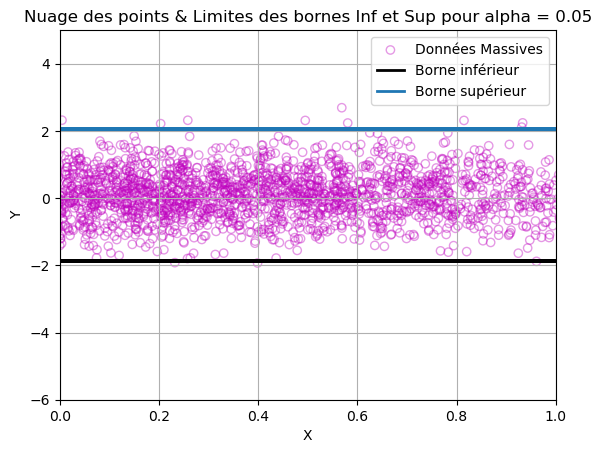

In [65]:
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.scatter(X.flatten(), Y.flatten(), edgecolor='m', facecolor='none', alpha=0.4)
ax.axis([0, 1, np.floor(np.min(Y) - 3), np.floor(np.max(Y) + 3)])
ax.plot(X, B_inf, 'k', linewidth=2)
ax.plot(X, B_sup, linewidth=2)
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(['Données Massives', 'Borne inférieur', 'Borne supérieur'])
ax.set_title(f'Nuage des points & Limites des bornes Inf et Sup pour alpha = {alpha}')

plt.show()

<h5>5-5 Récapitulatif des zones de confiance et de zones de risque</h5>

In [66]:

print(f"Le nombre total de l'échantillon n: {n}")
print("Le nombre d'échantillons appartenant à la:")
print(f"\t Borne inférieure: {N1}")
print(f"\t Borne supérieure: {N2}")
print(f"\t Zone de risque : {N1 + N2}")
print(f"\t Zone de confiance: {n - (N1 + N2)}")
zones = ['Borne inférieure', 'Borne supérieure', 'Zone de risque', 'Zone de confiance']


Le nombre total de l'échantillon n: 4500
Le nombre d'échantillons appartenant à la:


NameError: name 'N1' is not defined

In [ ]:
plt.figure(figsize=(8, 2))
plt.plot([0, N1, N1, n - N2, n - N2, n], [0, 0, 1, 1, 0, 0], color='red', linewidth=5)
plt.fill_between([N1, n - N2], [0, 0], [1, 1], color='white')
plt.xticks([0, N1, n - N2, n], [0, N1, n-N2, n])
plt.yticks([0, 1], ['Zone de Risque', 'Zone de Confiance'])
plt.xlabel("Nombre d'échantillons")
plt.title('Zones de confiance et de risque')
plt.show()

<font color="purple">
    <h2 >Question 6 : Exemple 1 de data collectées : Âges des étudiants d’une université.</h2>
</font>

<h5> 6.1 Chargement de l'ensemble de données </h5>

In [124]:
import pandas as pd

ages = np.loadtxt("AgesEtudiants.txt" , delimiter=',')

data = pd.DataFrame(ages, columns=['age'])
data

,age
0,23.6204
1,21.8397
2,21.4179
3,21.3779
4,20.4668
...,...
995,24.2056
996,23.4244
997,21.3185
998,21.3429


<h5> 6.2 Vérfication de dimension et de la marge d'âge </h5>

In [125]:
data = pd.DataFrame(ages)
print("Dimension du fichier :",data.shape[0],"lignes x",data.shape[1],"colonnees")
print("Âge de plus jeune étudiant :",int(data.min()),"ans")
print("Âge de plus grand étudiant :",int(data.max()),"ans")

Dimension du fichier : 1000 lignes x 1 colonnees
Âge de plus jeune étudiant : 17 ans
Âge de plus grand étudiant : 26 ans


<h5> 6.3 Représentation Graphiques des âges des étudiants </h5>

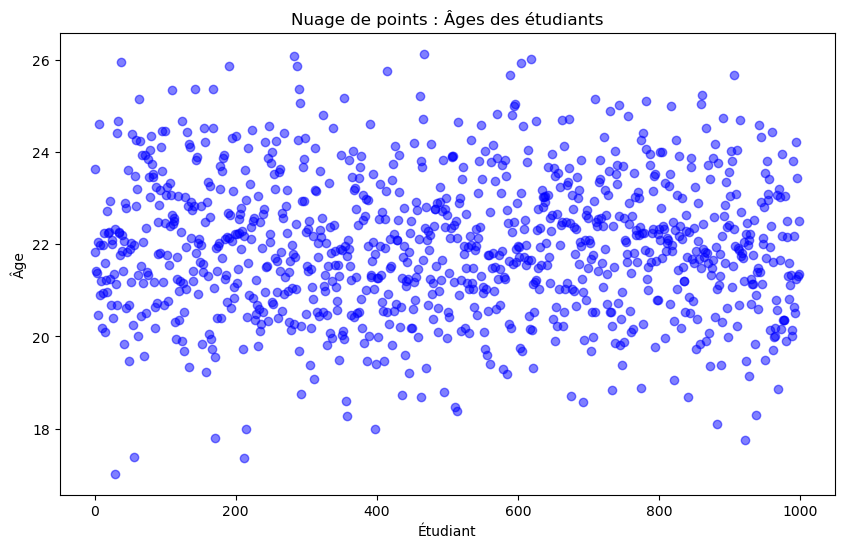

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(data)), data, c='blue', alpha=0.5) 
plt.xlabel('Étudiant') 
plt.ylabel('Âge') 
plt.title('Nuage de points : Âges des étudiants') 
plt.show()

<h5> 6.4 Représentation Graphiques des âges des étudiants </h5>

In [136]:
mu = float(data.mean())
sd = float(data.std(ddof=1))

print("Mean (MLE):", mu)
print("Standard Deviation (MLE):", sd)

alpha = (100-95)/100 # Pourcentage de confiance 95%
z = norm.ppf(1 - alpha / 2) 

confidence_interval = mu + 1.96 * sd / (len(data)**0.5), mu - 1.96 * sd / (len(data)**0.5)

print("95% Confidence Interval:", confidence_interval)


Mean (MLE): 21.9651797
Standard Deviation (MLE): 1.503890305211127
95% Confidence Interval: (22.058391786824053, 21.871967613175947)


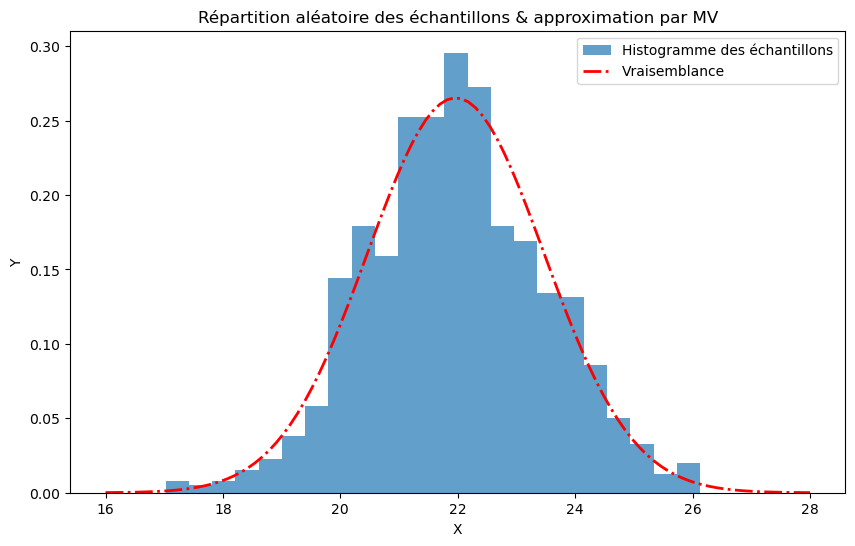

In [151]:
plt.figure(figsize=(10, 6))

# Plot histogram of the data
plt.hist(data, bins='auto', density=True, alpha=0.7, label='Histogramme des échantillons')

# Define the range of values for plotting the normal distribution
z = np.linspace(16, 28, 100)

# Calculate the probability density function of the normal distribution
norm_pdf = norm.pdf(z, loc=mu, scale=sd)

# Plot the normal distribution curve
plt.plot(z, norm_pdf, '-.r', linewidth=2, label='Vraisemblance')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Répartition aléatoire des échantillons & approximation par MV')

plt.show()

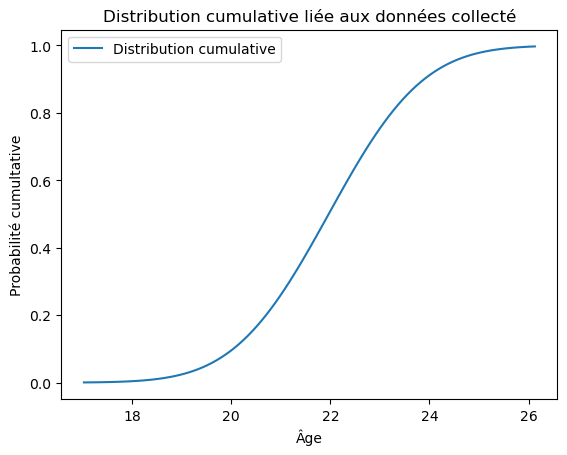

In [143]:
# Calculate CDF values for the normal distribution
cdf = norm.cdf(x, loc=mu, scale=sd)

# Plot the CDF of the normal distribution
plt.plot(x, cdf, label='Distribution cumulative')

plt.xlabel('Âge')
plt.ylabel('Probabilité cumultative')
plt.title('Distribution cumulative liée aux données collecté')
plt.legend()

plt.show()

In [141]:
# Define age groups
age_groups = [19, 20, 21.4, 23, 24, 26]

# Calculate probabilities of validation for each age group
validation_probs = [norm.cdf(age, loc=mu, scale=sd) for age in age_groups]

# Calculate probabilities of non-validation by subtracting validation probabilities from 1
non_validation_probs = [1 - prob for prob in validation_probs]

# Create a DataFrame to display the results
results = pd.DataFrame({'Age': age_groups,
                        'Probabilites de validation': validation_probs,
                        'Probabilites de non-validation': non_validation_probs})

results

,Age,Probabilites de validation,Probabilites de non-validation
0,19.0,0.024323,0.975677
1,20.0,0.095652,0.904348
2,21.4,0.353528,0.646472
3,23.0,0.754304,0.245696
4,24.0,0.911978,0.088022
5,26.0,0.996351,0.003649
